# Library

In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [ ]:
url = "https://drive.google.com/file/d/1u95FUEFI29NV-LmdCRHzRwj-t4tWH87m/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [ ]:
df.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


<Axes: xlabel='time'>

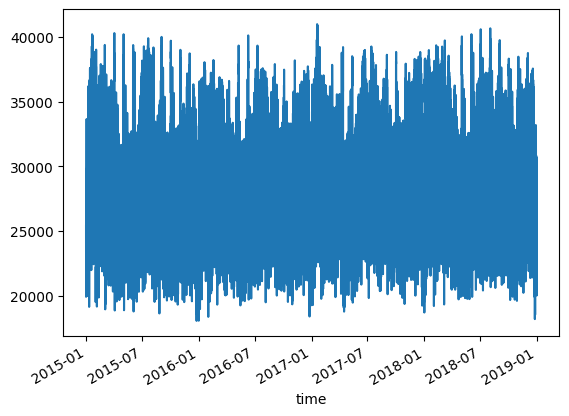

In [ ]:
df['total load actual'].plot()

<ipython-input-37-150425f37d81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total load actual'])


<Axes: xlabel='total load actual', ylabel='Density'>

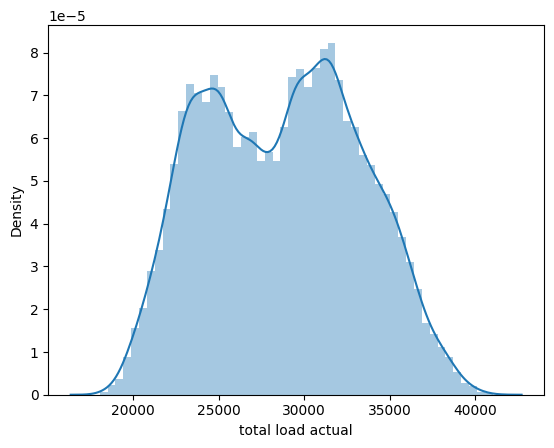

In [ ]:
sns.distplot(df['total load actual'])

In [ ]:
df.corr()['total load actual']

generation biomass                             0.083288
generation fossil brown coal/lignite           0.280461
generation fossil coal-derived gas                  NaN
generation fossil gas                          0.548913
generation fossil hard coal                    0.396564
generation fossil oil                          0.497089
generation fossil oil shale                         NaN
generation fossil peat                              NaN
generation geothermal                               NaN
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption   -0.562809
generation hydro run-of-river and poundage     0.118570
generation hydro water reservoir               0.479481
generation marine                                   NaN
generation nuclear                             0.085664
generation other                               0.100690
generation other renewable                     0.181714
generation solar                               0

In [ ]:
# memindah kolom target ke urutan pertama
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('total load actual')) #Remove b from list
df = df[['total load actual']+cols] #Create new dataframe with columns in the order you want

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

Feature Extraction

In [ ]:
# # Data 2

# All
df_new = df.drop(df.columns[[10, 23, 25]], axis=1)

# tanpa minus & nan
# df_new = df.drop(df.columns[[3, 7, 8, 9, 10, 11, 14, 20, 23, 25]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# Target
# df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

In [ ]:
values = df_new.values

In [ ]:
values.shape

(35064, 25)

## Normalisasi

In [ ]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# Z-score
# scaled = stats.zscore(values, axis = 1)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [ ]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t),var23(t),var24(t),var25(t)
1,0.319666,0.755068,0.329329,0.0,0.241789,0.576744,0.360802,0.0,0.0,0.0,...,0.40566,0.596639,0.008633,0.546218,0.0,0.337807,0.002742,0.326819,0.460723,0.517261
2,0.276008,0.758446,0.328328,0.0,0.259359,0.568848,0.351893,0.0,0.0,0.0,...,0.40566,0.613445,0.008633,0.549020,0.0,0.313203,0.001371,0.303437,0.453017,0.513166
3,0.204274,0.756757,0.323323,0.0,0.242438,0.548032,0.349666,0.0,0.0,0.0,...,0.40566,0.630252,0.008633,0.535014,0.0,0.300413,0.000343,0.285814,0.402382,0.465153
4,0.141247,0.739865,0.254254,0.0,0.215334,0.494198,0.356347,0.0,0.0,0.0,...,0.40566,0.621849,0.007251,0.529412,0.0,0.283035,0.001542,0.268947,0.363755,0.434633
5,0.096762,0.722973,0.187187,0.0,0.206150,0.459385,0.347439,0.0,0.0,0.0,...,0.40566,0.621849,0.005870,0.526611,0.0,0.264854,0.000685,0.254755,0.336836,0.412208


In [ ]:
reframed.shape

(34984, 50)

In [ ]:
# Data 2

# All
reframed.drop(reframed.columns[[x for x in range(26, 50)]], axis=1, inplace=True)

# no minus dan NaN
# reframed.drop(reframed.columns[[x for x in range(19, 36)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
#reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var1(t)
1,0.319666,0.755068,0.329329,0.0,0.241789,0.576744,0.360802,0.0,0.0,0.0,...,0.613445,0.008460,0.549020,0.0,0.365795,0.002913,0.360554,0.480737,0.521820,0.276008
2,0.276008,0.758446,0.328328,0.0,0.259359,0.568848,0.351893,0.0,0.0,0.0,...,0.596639,0.008633,0.546218,0.0,0.337807,0.002742,0.326819,0.460723,0.517261,0.204274
3,0.204274,0.756757,0.323323,0.0,0.242438,0.548032,0.349666,0.0,0.0,0.0,...,0.613445,0.008633,0.549020,0.0,0.313203,0.001371,0.303437,0.453017,0.513166,0.141247
4,0.141247,0.739865,0.254254,0.0,0.215334,0.494198,0.356347,0.0,0.0,0.0,...,0.630252,0.008633,0.535014,0.0,0.300413,0.000343,0.285814,0.402382,0.465153,0.096762
5,0.096762,0.722973,0.187187,0.0,0.206150,0.459385,0.347439,0.0,0.0,0.0,...,0.621849,0.007251,0.529412,0.0,0.283035,0.001542,0.268947,0.363755,0.434633,0.081135


## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Grid Search

In [ ]:
#design network LSTM
model = Sequential()
model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 32)             7424      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)              33        
Total params: 15,777
Trainable params: 15,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
350/350 [==============================] - 6s 7ms/step - loss: 0.0208 - val_loss: 0.0076
Epoch 2/50
350/350 [==============================] - 1s 4ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 3/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 4/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 5/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 6/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 7/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 8/50
350/350 [==============================] - 2s 6ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 9/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 10/50
350/350 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0044

# Evaluasi

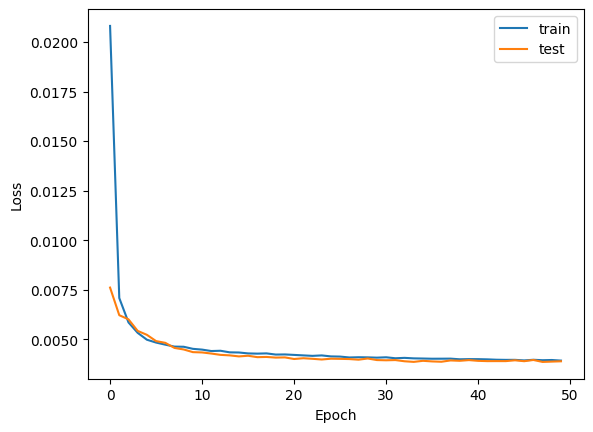

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
from sklearn.metrics import mean_absolute_percentage_error as mape
np.seterr(divide='ignore', invalid='ignore')

# print('==============minmax===================')
print(f'MAPE test: %.4f' % (mape(inv_y, inv_yhat)*100))

# print('==============zscore===================')
# print(f'MAPE test: %.4f' % (mape(inv_yhat, inv_y)*100))

# print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.4f' % rmsetest)

print(f'R2 test is : %.5f' % r2_score(test_y, yhat))

MAPE test: 3.9288
RMSE Testing is : 0.0624
R2 test is : 0.90171


Actual : [[0.27600766]
 [0.2042744 ]
 [0.14124663]
 ...
 [0.43658048]
 [0.33777313]
 [0.27918517]]
Predicted: [[0.3405354 ]
 [0.30164447]
 [0.22140317]
 ...
 [0.5100932 ]
 [0.44630846]
 [0.35351706]]


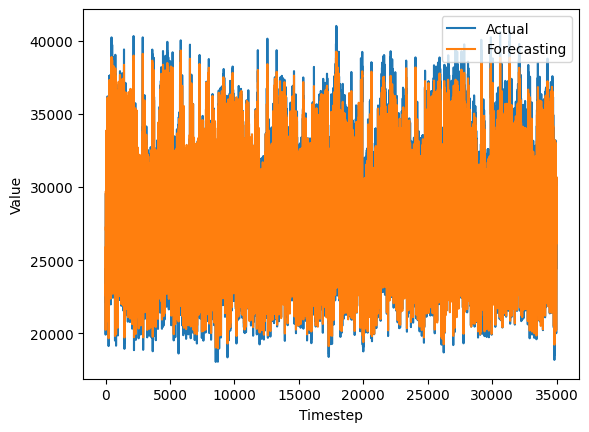

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(inv_y, label='Actual')
pyplot.plot(inv_yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

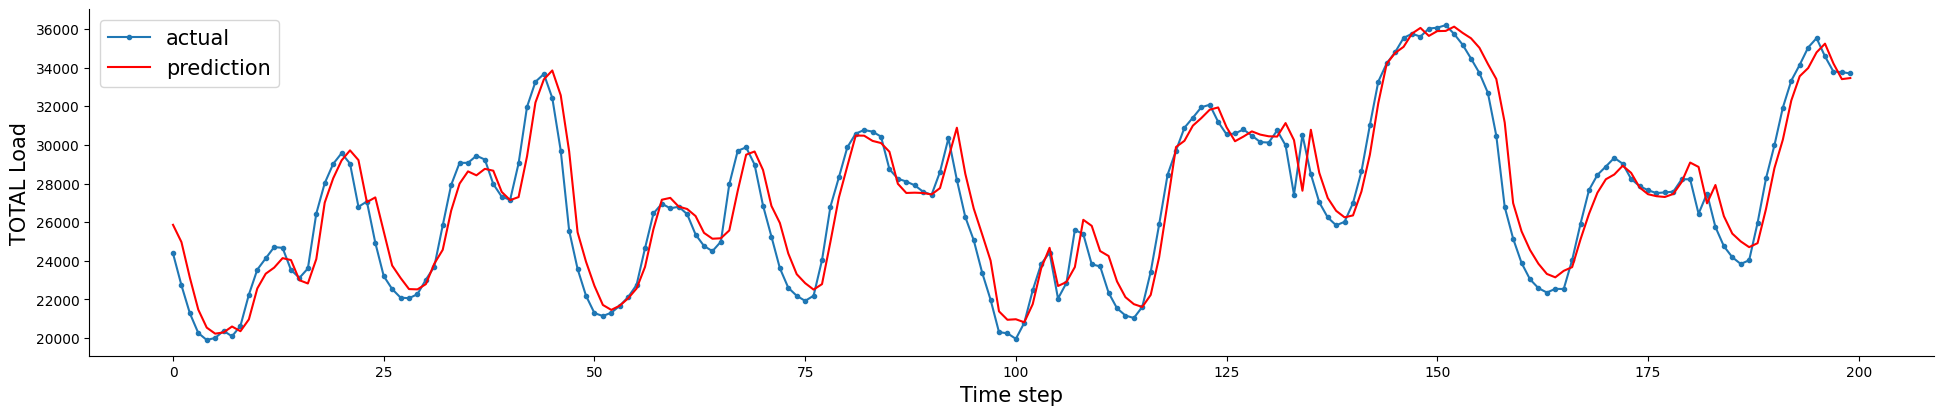

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, inv_y[:idx], marker='.', label="actual")
pyplot.plot(aa, inv_yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()